In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train'):
    for filename in filenames[:10]:  #dont want to list all
        print(os.path.join(dirname, filename))

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/be9d33541d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/4c3aa8ea6e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/18e7abc37e.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/6a20935af5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/e642d9ea5f.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f3b08f78d.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/68e7e02a47.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/f17eacf7d8.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/3f970065e5.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/7030643376.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/a171e61840.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/4171ea3a0c.csv


In [2]:
##load one file import pandas as pd
import os

TDCF_PATH = "/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"

# list files
tdcs_files = [f for f in os.listdir(TDCF_PATH) if f.endswith(".csv")]
print("Total files:", len(tdcs_files))
print("Example file:", tdcs_files[0])

# load one file
sample_file = os.path.join(TDCF_PATH, tdcs_files[0])
df = pd.read_csv(sample_file)

print("Shape:", df.shape)
print(df.head())

Total files: 833
Example file: a171e61840.csv
Shape: (7400, 7)
   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.665890  0.042550  0.184744                0     0        0
1     1 -9.672969  0.049217  0.184644                0     0        0
2     2 -9.670260  0.033620  0.193790                0     0        0
3     3 -9.673356  0.035159  0.184369                0     0        0
4     4 -9.671458  0.043913  0.197814                0     0        0


In [3]:
## check columns and missing values
print(df.info())
print("Missing values:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             7400 non-null   int64  
 1   AccV             7400 non-null   float64
 2   AccML            7400 non-null   float64
 3   AccAP            7400 non-null   float64
 4   StartHesitation  7400 non-null   int64  
 5   Turn             7400 non-null   int64  
 6   Walking          7400 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 404.8 KB
None
Missing values:
 Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
dtype: int64


In [4]:
print(df.describe())

              Time         AccV        AccML        AccAP  StartHesitation  \
count  7400.000000  7400.000000  7400.000000  7400.000000           7400.0   
mean   3699.500000    -9.552417    -0.234774     1.367005              0.0   
std    2136.340329     1.352304     1.364697     1.740077              0.0   
min       0.000000   -19.100829   -10.236919    -6.935966              0.0   
25%    1849.750000    -9.920110    -0.816193     0.196024              0.0   
50%    3699.500000    -9.614216    -0.073157     1.030384              0.0   
75%    5549.250000    -8.823653     0.340746     2.211536              0.0   
max    7399.000000    -1.626198     6.198660    13.895672              0.0   

              Turn  Walking  
count  7400.000000   7400.0  
mean      0.381216      0.0  
std       0.485718      0.0  
min       0.000000      0.0  
25%       0.000000      0.0  
50%       0.000000      0.0  
75%       1.000000      0.0  
max       1.000000      0.0  


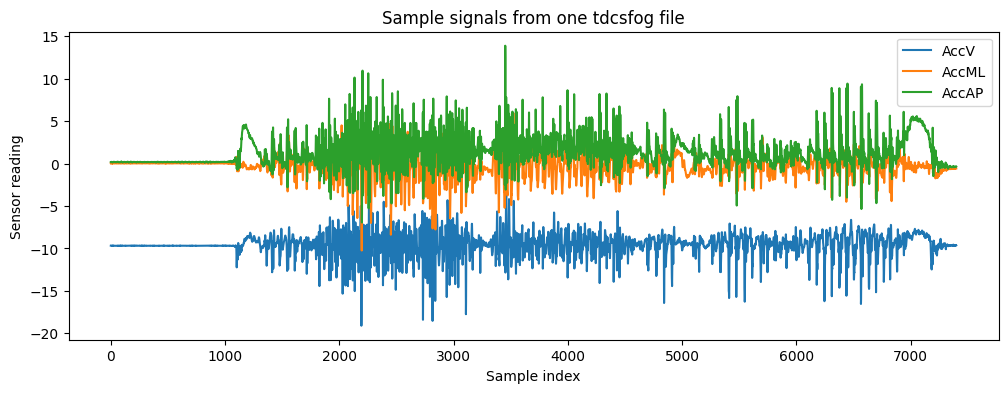

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for col in df.columns[1:4]:   # plot first 3 numeric columns
    plt.plot(df.index, df[col], label=col)
plt.legend()
plt.title("Sample signals from one tdcsfog file")
plt.xlabel("Sample index")      # x-axis label
plt.ylabel("Sensor reading")    # y-axis label -- AccV, AccML, etc

plt.show()